In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [2]:
np.random.seed(1)
tf.random.set_seed(1)

In [3]:
dataset = tf.keras.datasets.mnist

In [4]:
(x_train, y_train), (x_test, y_test) = dataset.load_data()

In [5]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1).astype(float)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1).astype(float)

y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

y_train_cat = tf.keras.utils.to_categorical(y_train).astype(float)
y_test_cat  = tf.keras.utils.to_categorical(y_test).astype(float)

print(y_train_cat.shape)
print(y_test_cat.shape)

(60000, 28, 28, 1)
(60000, 1)
(10000, 28, 28, 1)
(10000, 1)
(60000, 10)
(10000, 10)


In [6]:
class CNN_Digit_Classifier(tf.keras.Model):
    
    def __init__(self):
        super().__init__()
        self.L1 = tf.keras.layers.Convolution2D(20, (5, 5), activation='relu', input_shape=(28, 28, 1))
        self.L2 = tf.keras.layers.MaxPool2D(strides=(2, 2))
        self.L3 = tf.keras.layers.Convolution2D(50, (5, 5), activation='relu')
        self.L4 = tf.keras.layers.MaxPool2D((2, 2), (2, 2))
        self.L5 = tf.keras.layers.Flatten()
        self.L6 = tf.keras.layers.Dense(500, activation='relu')
        self.L7 = tf.keras.layers.Dense(10, activation='softmax')
        
    def call(self, inputs):
        
        self.x = self.L1(inputs)
        self.x = self.L2(self.x)
        self.x = self.L3(self.x)
        self.x = self.L4(self.x)
        self.x = self.L5(self.x)
        self.x = self.L6(self.x)
        self.x = self.L7(self.x)
        
        return self.x

In [7]:
model = CNN_Digit_Classifier()

In [8]:
model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [9]:
hist = model.fit(x_train, y_train_cat, epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 99us/sample - loss: 0.3257 - accuracy: 0.9514
Epoch 2/20
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0639 - accuracy: 0.9809
Epoch 3/20
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0530 - accuracy: 0.9846
Epoch 4/20
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0502 - accuracy: 0.9860
Epoch 5/20
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0447 - accuracy: 0.9875
Epoch 6/20
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0389 - accuracy: 0.9896
Epoch 7/20
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0412 - accuracy: 0.9894
Epoch 8/20
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0377 - accuracy: 0.9906
Epoch 9/20
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0385 - accuracy: 0.9913
Epoch 10/20
60

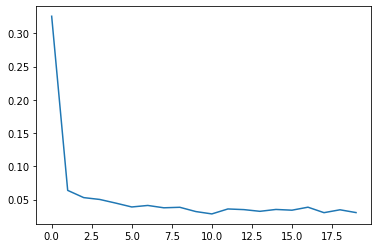

Accuracy: 0.9837


In [10]:
plt.plot(hist.history['loss'])
plt.show()

print('Accuracy:', model.evaluate(x_test, y_test_cat, verbose=0)[1])

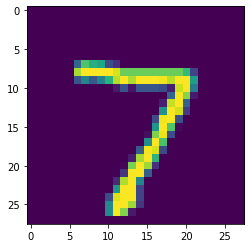

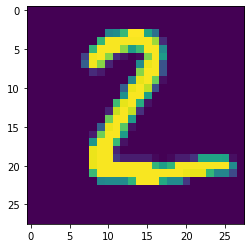

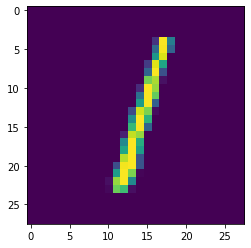

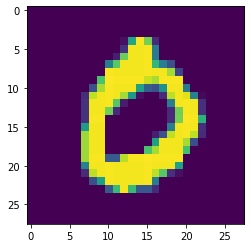

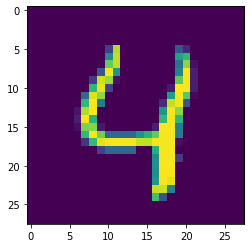

[7 2 1 0 4]


In [11]:
x_test_p = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2])

y_predicted = model.predict(x_test[0:5, :, :, :])

for i in range(5):
    plt.imshow(x_test_p[i])
    plt.show()

print(np.argmax(y_predicted, axis=1))